In [15]:
import pandas as pd
import scipy as sp
import numpy.lib.financial as fin
# import pandas_datareader as pddata
# import mplfinance as mpf
# from mplfinance.plotting import plot
from pandas.plotting import register_matplotlib_converters
# # from mplfinance._utils import _construct_ohlc_collections
# from mplfinance._utils import _construct_candlestick_collections
# from mplfinance._utils import IntegerIndexDateTimeFormatter
from matplotlib.pyplot import * 
import matplotlib.pyplot as plt
%matplotlib inline
# import yfinance as yf
#pip install yfinance
#pip install pandas-datareader
#pip install mplfinance
#https://github.com/victurtle/vn_quantopian
#https://github.com/talolard/MarketVectors/blob/master/preparedata.ipynb

In [2]:
#sp.fv(rate,nper,pmt,pv=0,when='end')
sp.fv(0.1,2,0,100,when='end')

<ipython-input-2-9628e070ed71>:2: DeprecationWarning: scipy.fv is deprecated and will be removed in SciPy 2.0.0, use numpy.fv instead
  sp.fv(0.1,2,0,100,when='end')


-121.00000000000001

In [3]:
sp.pv(0.1,2,0,-121.00000000000001,when='end')

<ipython-input-3-297ecaeaddc0>:1: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
  sp.pv(0.1,2,0,-121.00000000000001,when='end')


100.0

In [4]:
fin.pv(0.1,2,0,-121.00000000000001)

<ipython-input-4-f4a1d569c065>:1: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  fin.pv(0.1,2,0,-121.00000000000001)


100.0

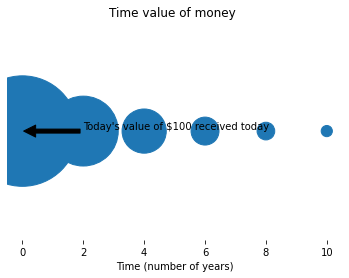

In [5]:
from matplotlib.pyplot import * 
fig1 = figure(facecolor='white') 
ax1 = axes(frameon=False) 
ax1.set_frame_on(False) 
ax1.get_xaxis().tick_bottom() 
ax1.axes.get_yaxis().set_visible(False) 
x=range(0,11,2) 
x1=range(len(x),0,-1) 
y = [0]*len(x); 
name="Today's value of $100 received today" 
annotate(name,xy=(0,0),xytext=(2,0.001),arrowprops=dict(facecolor='black',shrink=0.02)) 
s = [50*2.5**n for n in x1]; 
title("Time value of money ") 
xlabel("Time (number of years)") 
scatter(x,y,s=s)
show()

<ipython-input-6-c57758f8be94>:6: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  npv.append(sp.npv(0.01*i,cashflows))


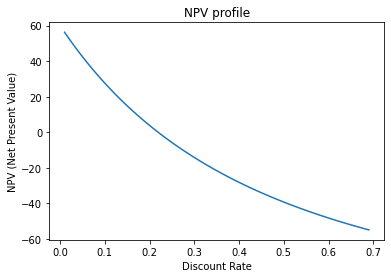

In [6]:
cashflows=[-120,50,60,70] 
rate=[] 
npv =[] 
for i in range(1,70):    
    rate.append(0.01*i)    
    npv.append(sp.npv(0.01*i,cashflows))
title("NPV profile") 
xlabel("Discount Rate") 
ylabel("NPV (Net Present Value)") 
plot(rate,npv) 
show()

<ipython-input-7-d3630967e4f5>:6: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  npv.append(sp.npv(0.01*i,cashflows))


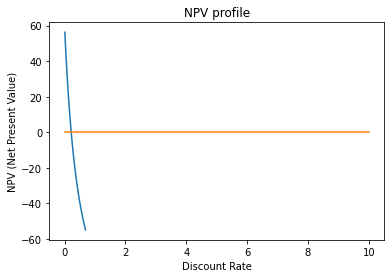

In [7]:
cashflows=[-120,50,60,70] 
rate=[] 
npv =[] 
for i in range(1,70):    
    rate.append(0.01*i)    
    npv.append(sp.npv(0.01*i,cashflows))
title("NPV profile") 
xlabel("Discount Rate") 
ylabel("NPV (Net Present Value)") 
plot(rate,npv) 
plot(x,y)
show()

<ipython-input-8-f6937149ffc3>:8: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  npv.append(sp.npv(0.01*i,cashflows))


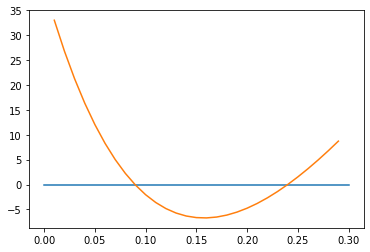

In [8]:
cashflows=[504,-432,-432,-432,832] 
rate=[] 
npv=[] 
x=[0,0.3] 
y=[0,0] 
for i in range(1,30):     
    rate.append(0.01*i)    
    npv.append(sp.npv(0.01*i,cashflows))    
plt.plot(x,y),plt.plot(rate,npv) 
plt.show()

In [9]:
def pvFunction(fv,r,n):    
    return fv/(1+r)**n 
def pvPerpetuity(c,r):    
    return c/r 
def pvPerpetuityDue(c,r):   
    return c/r*(1+r) 
def pvAnnuity(c,r,n):    
    return c/r*(1-1/(1+r)**n) 
def pvAnnuityDue(c,r,n):    
    return c/r*(1-1/(1+r)**n)*(1+r)
def pvGrowingAnnuity(c,r,n,g):    
    return c/(r-g)*(1-(1+g)**n/(1+r)**n) 
def fvFunction(pv,r,n):    
    return pv*(1+r)**n 
def fvAnnuity(cv,r,n):    
    return c/r*((1+r)**n-1) 
def fvAnnuityDue(cv,r,n):    
    return c/r*((1+r)**n-1)*(1+r) 
def fvGrowingAnnuity(cv,r,n):    
    return c/(r-g)*((1+r)**n-(1+g)*n)

In [11]:
x = pd.read_csv(r'D:\Python + SQL + R\Python for finance\IBM.csv')

In [12]:
x.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-01,134.970001,140.490005,132.119995,138.130005,131.808121,68461200
1,2019-03-01,139.309998,142.119995,133.580002,141.100006,136.210953,74687300
2,2019-04-01,141.509995,145.389999,136.259995,140.270004,135.409698,80197500
3,2019-05-01,140.550003,141.809998,126.849998,126.989998,122.589836,75536400
4,2019-06-01,127.099998,140.149994,127.059998,137.899994,134.703110,61341600


In [13]:
# import pandas_datareader.data as getData
df = pddata.data.get_data_yahoo("IBM") 
df.tail()

NameError: name 'pddata' is not defined

In [ ]:
import datetime as dt

In [ ]:
begin_date = dt.datetime(2000,1,1)
end_date = dt.datetime(2019,12,31)

In [ ]:
df = pddata.data.get_data_yahoo("IBM", begin_date,end_date) 
df.tail()

In [ ]:
import yfinance as yf
#https://pypi.org/project/yfinance/

In [ ]:
IBM = yf.Ticker("IBM")
IBM.calendar

In [17]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
stock.major_holders

# show institutional holders
stock.institutional_holders

# show balance heet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts


NameError: name 'stock' is not defined

In [ ]:
#If you want to use a proxy server for downloading data, use:
import yfinance as yf

msft = yf.Ticker("MSFT")

msft.history(..., proxy="PROXY_SERVER")
msft.get_actions(proxy="PROXY_SERVER")
msft.get_dividends(proxy="PROXY_SERVER")
msft.get_splits(proxy="PROXY_SERVER")
msft.get_balance_sheet(proxy="PROXY_SERVER")
msft.get_cashflow(proxy="PROXY_SERVER")
msgt.option_chain(..., proxy="PROXY_SERVER")

In [ ]:
#To initialize multiple Ticker objects, use
import yfinance as yf

tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects

# access each ticker using (example)
tickers.msft.info
tickers.aapl.history(period="1mo")
tickers.goog.actions

In [ ]:
#Fetching data for multiple tickers
import yfinance as yf
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")
#I’ve also added some options to make life easier :)
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None

In [ ]:
#pandas_datareader override
# If your code uses pandas_datareader and you want to download data faster, 
# you can “hijack” pandas_datareader.data.get_data_yahoo() method to use yfinance 
# while making sure the returned data is in the same format as pandas_datareader’s get_data_yahoo().
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

In [ ]:
from matplotlib.pyplot import * 
time=[3/12,6/12,2,3,5,10,30] 
rate=[0.47,0.6,1.18,1.53,2,2.53,3.12] 
title("Term Structure of Interest Rate ") 
xlabel("Time ") 
ylabel("Risk-free rate (%)") 
plot(time,rate) 
show()

In [ ]:
def duration(t,cash_flow,y):    
    n=len(t) 
    B,D=0,0 
    for i in range(n):        
        B+=cash_flow[i]*exp(-y*t[i]) 
    for i in range(n):        
        D+=t[i]*cash_flow[i]*exp(-y*t[i])/B    
    return D

In [ ]:
def duration(t,cash_flow,y):    
    n=len(t)    
    B=0     # B is the bond's present value    
    for i in range(n):        
        B+=cash_flow[i]*exp(-y*t[i])
    D=0     # D is the duration    
    for i in range(n):        
        D+=t[i]*cash_flow[i]*exp(-y*t[i])/B    
    return D 

In [ ]:
import statsmodels.api as sm
import pandas as pd 
y = [0.065, 0.0265, -0.0593, -0.001,0.0346] 
x1 = [0.055, -0.09, -0.041,0.045,0.022] 
x2 = [0.025, 0.10, 0.021,0.145,0.012] 
x3=  [0.015, -0.08, 0.341,0.245,-0.022] 
df=pd.DataFrame({"y":y,"x1":x1, 'x2':x2,'x3':x3})
y = df['y']
x=df[['x1','x2','x3']]
result=sm.OLS(y,x).fit()
print(result.params)
print(result.summary())

In [ ]:
import scipy.stats as stats 
alpha=0.05 
dfNumerator=3 
dfDenominator=1 
f=stats.f.ppf(q=1-alpha, dfn=dfNumerator, dfd=dfDenominator) 
print(f)

In [ ]:
import pandas as pd 
import scipy as sp
price=[10,11,12.2,14.0,12]
x=pd.DataFrame({'Price':price}) 
x['diff']=x.diff() 
x['Ret']=x['Price'].diff()/x['Price'].shift(1) 
x['RetLag']=x['Ret'].shift(1) 
x['RetLead']=x['Ret'].shift(-1) 
print(x)

In [ ]:
import scipy as sp 
import numpy as np
mean=0.10
Rf=0.02 
std=0.20 
n=100 
sp.random.seed(12456) 
x=sp.random.normal(loc=mean,scale=std,size=n)
print("std=", sp.std(x))
y=x[x-Rf<0] 
m=len(y) 
total=0.0 
for i in sp.arange(m):    
    total+=(y[i]-Rf)**2
LPSD=total/(m-1) 
print("y=",y) 
print("LPSD=",LPSD)

In [ ]:
import pandas as pd 
import scipy as sp 
sp.random.seed(1257) 
mean=0.10 
std=0.2
ddate = pd.date_range('1/1/2016', periods=252) 
n=len(ddate) 
rets=sp.random.normal(mean,std,n) 
data = pd.DataFrame(rets, index=ddate,columns=['RET']) 
print(data.head())

In [ ]:
from scipy import stats 
import scipy as sp 
sp.random.seed(12345) 
mean=0.1 
std=0.2 
n=5000 
ret=sp.random.normal(loc=0,scale=std,size=n) 
print ('W-test, and P-value' )
print(stats.shapiro(ret))

In [ ]:
from scipy import stats,random 
import numpy as np 
np.random.seed(12345) 
ret = random.normal(0,1,500000) 
print('mean    =', np.mean(ret)) 
print('std     =',np.std(ret)) 
print('skewness=',stats.skew(ret)) 
print('kurtosis=',stats.kurtosis(ret))

In [ ]:
import scipy as sp 
sigma1=0.06 
sigma2=0.24 
var1=sigma1**2 
var2=sigma2**2 
rho=-1 
n=1000 
portVar=10   # assign a big number 
tiny=1.0/n
for i in sp.arange(n):    
    w1=i*tiny    
    w2=1-w1
var=w1**2*var1 +w2**2*var2+2*w1*w2*rho*sigma1*sigma2    
if(var<portVar):        
    portVar=var        
    finalW1=w1    
#print(vol) 
print("min vol=",sp.sqrt(portVar), "w1=",finalW1)

<ipython-input-18-51a190a56e04>:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x=sp.arange(-5,5,0.01)


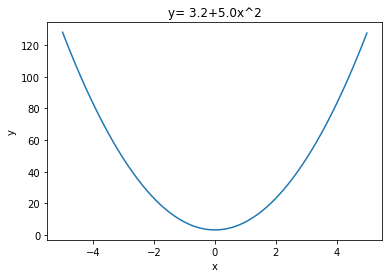

In [18]:
import scipy as sp 
import matplotlib.pyplot as plt 
x=sp.arange(-5,5,0.01) 
a=3.2 
b=5.0 
y=a+b*x**2 
plt.plot(x,y)
plt.title("y= "+str(a)+"+"+str(b)+"x^2") 
plt.ylabel("y") 
plt.xlabel("x") 
plt.show()

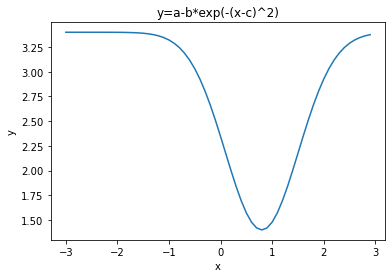

0.7999999995280379


In [19]:
from scipy import optimize 
import numpy as np 
import matplotlib.pyplot as plt # define a function
a=3.4 
b=2.0 
c=0.8 
def f(x):    
    return a-b*np.exp(-(x - c)**2)
x=np.arange(-3,3,0.1) 
y=f(x) 
plt.title("y=a-b*exp(-(x-c)^2)") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y) 
plt.show()
# find the minimum 
solution= optimize.brent(f) 
print(solution)

In [20]:
import numpy as np 
ret=np.matrix(np. array([[0.1,0.2],[0.10,0.1071],[-0.02,0.25],[0.012,0.028],[0.06,0.262],[0.14,0.115]])) 
print("return matrix") 
print(ret) 
covar=ret.T*ret 
print("covar") 
print(covar) 
weight=np.matrix(np.array([0.4,0.6])) 
print("weight ") 
print(weight) 
print("mean return") 
print(weight*covar*weight.T)

return matrix
[[ 0.1     0.2   ]
 [ 0.1     0.1071]
 [-0.02    0.25  ]
 [ 0.012   0.028 ]
 [ 0.06    0.262 ]
 [ 0.14    0.115 ]]
covar
[[0.043744   0.057866  ]
 [0.057866   0.19662341]]
weight 
[[0.4 0.6]]
mean return
[[0.10555915]]


In [21]:
import numpy as np 
ret=np.matrix(np. array([[0.1,0.2],[0.10,0.1071],[-0.02,0.25],[0.012,0.028],[0.06, 0.262],[0.14,0.115]])) 
covar=np.dot(ret.T,ret) 
print("covar") 
print(covar)

covar
[[0.043744   0.057866  ]
 [0.057866   0.19662341]]


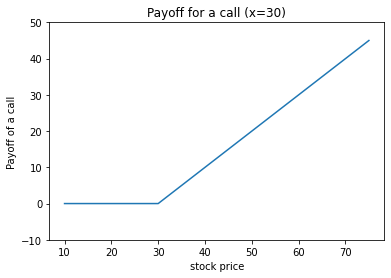

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
s = np.arange(10,80,5) 
x=30 
payoff=(abs(s-x)+s-x)/2 
plt.ylim(-10,50) 
plt.plot(s,payoff) 
plt.title("Payoff for a call (x=30)") 
plt.xlabel("stock price") 
plt.ylabel("Payoff of a call") 
plt.show() 

<ipython-input-23-1d2008747af4>:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  s = sp.arange(30,70,5)
<ipython-input-23-1d2008747af4>:7: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  y2=sp.zeros(len(s))


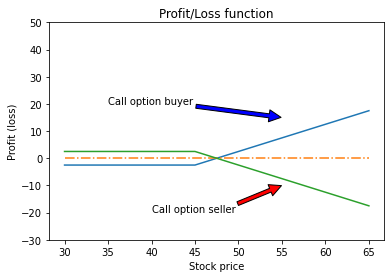

In [23]:
import scipy as sp 
import matplotlib.pyplot as plt 
s = sp.arange(30,70,5) 
x=45;
c=2.5 
y=(abs(s-x)+s-x)/2 -c 
y2=sp.zeros(len(s)) 
plt.ylim(-30,50) 
plt.plot(s,y) 
plt.plot(s,y2,'-.') 
plt.plot(s,-y) 
plt.title("Profit/Loss function") 
plt.xlabel('Stock price') 
plt.ylabel('Profit (loss)') 
plt.annotate('Call option buyer', 
             xy=(55,15), xytext=(35,20),             
             arrowprops=dict(facecolor='blue',shrink=0.01),) 
plt.annotate('Call option seller', xy=(55,-10), xytext=(40,-20),             
             arrowprops=dict(facecolor='red',shrink=0.01),) 
plt.show()

<ipython-input-24-3ab4b1f4d881>:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  s = sp.arange(30,70,5)
<ipython-input-24-3ab4b1f4d881>:6: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  y2=sp.zeros(len(s))


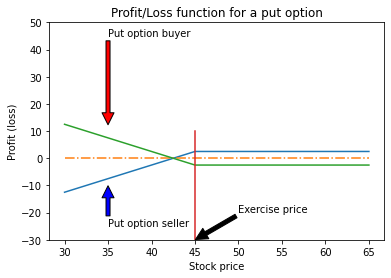

In [24]:
import scipy as sp 
import matplotlib.pyplot as plt 
s = sp.arange(30,70,5)
x=45;p=2;c=2.5 
y=c-(abs(x-s)+x-s)/2 
y2=sp.zeros(len(s)) 
x3=[x, x] 
y3=[-30,10] 
plt.ylim(-30,50) 
plt.plot(s,y) 
plt.plot(s,y2,'-.') 
plt.plot(s,-y) 
plt.plot(x3,y3) 
plt.title("Profit/Loss function for a put option") 
plt.xlabel('Stock price') 
plt.ylabel('Profit (loss)') 
plt.annotate('Put option buyer', xy=(35,12), xytext=(35,45), arrowprops=dict(facecolor='red',shrink=0.01),) 
plt.annotate('Put option seller', xy=(35,-10), xytext=(35,-25), arrowprops=dict(facecolor='blue',shrink=0.01),) 
plt.annotate('Exercise price', xy=(45,-30), xytext=(50,-20), arrowprops=dict(facecolor='black',shrink=0.01),) 
plt.show()

In [25]:
def bs_call(S,X,T,rf,sigma):    
    from scipy  import log,exp,sqrt,stats    
    d1=(log(S/X)+(rf+sigma*sigma/2.)*T)/(sigma*sqrt(T))    
    d2 = d1-sigma*sqrt(T)    
    return S*stats.norm.cdf(d1)-X*exp(-rf*T)*stats.norm.cdf(d2)
def binomial_grid(n):    
    import networkx as nx     
    import matplotlib.pyplot as plt     
    G=nx.Graph()     
    for i in range(0,n+1):             
        for j in range(1,i+2):                     
            if i<n:                             
                G.add_edge((i,j),(i+1,j))                
                G.add_edge((i,j),(i+1,j+1))     
                posG={}    #dictionary with nodes position     
                for node in G.nodes():             
                    posG[node]=(node[0],n+2+node[0]-2*node[1])     
                    nx.draw(G,pos=posG)      
def delta_call(S,X,T,rf,sigma):    
    from scipy  import log,exp,sqrt,stats    
    d1=(log(S/X)+(rf+sigma*sigma/2.)*T)/(sigma*sqrt(T))    
    return(stats.norm.cdf(d1))
def delta_put(S,X,T,rf,sigma):    
    from scipy import log,exp,sqrt,stats    
    d1=(log(S/X)+(rf+sigma*sigma/2.)*T)/(sigma*sqrt(T))    
    return(stats.norm.cdf(d1)-1)

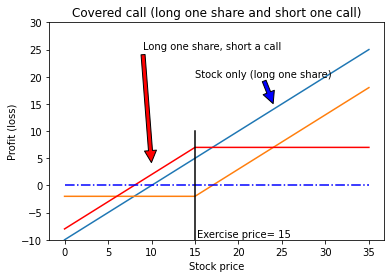

In [26]:
import matplotlib.pyplot as plt 
import numpy as np 
sT = np.arange(0,40,5) 
k=15;s0=10;c=2 
y0=np.zeros(len(sT)) 
y1=sT-s0                    # stock only 
y2=(abs(sT-k)+sT-k)/2-c     # long a call 
y3=y1-y2                    # covered-call
plt.ylim(-10,30) 
plt.plot(sT,y1) 
plt.plot(sT,y2) 
plt.plot(sT,y3,'red') 
plt.plot(sT,y0,'b-.') 
plt.plot([k,k],[-10,10],'black') 
plt.title('Covered call (long one share and short one call)') 
plt.xlabel('Stock price') 
plt.ylabel('Profit (loss)') 
plt.annotate('Stock only (long one share)', xy=(24,15),xytext=(15,20), arrowprops=dict(facecolor='blue',shrink=0.01),) 
plt.annotate('Long one share, short a call', xy=(10,4), xytext=(9,25), arrowprops=dict(facecolor='red',shrink=0.01),) 
plt.annotate('Exercise price= '+str(k), xy=(k+0.2,-10+0.5)) 
plt.show()

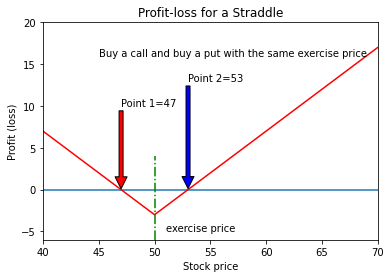

In [27]:
import matplotlib.pyplot as plt 
import numpy as np 
sT = np.arange(30,80,5) 
x=50;    c=2; p=1 
straddle=(abs(sT-x)+sT-x)/2-c + (abs(x-sT)+x-sT)/2-p 
y0=np.zeros(len(sT)) 
plt.ylim(-6,20) 
plt.xlim(40,70) 
plt.plot(sT,y0) 
plt.plot(sT,straddle,'r') 
plt.plot([x,x],[-6,4],'g-.')
plt.title("Profit-loss for a Straddle") 
plt.xlabel('Stock price') 
plt.ylabel('Profit (loss)') 
plt.annotate('Point 1='+str(x-c-p), xy=(x-p-c,0), xytext=(x-p-c,10), arrowprops=dict(facecolor='red',shrink=0.01),) 
plt.annotate('Point 2='+str(x+c+p), xy=(x+p+c,0), xytext=(x+p+c,13), arrowprops=dict(facecolor='blue',shrink=0.01),) 
plt.annotate('exercise price', xy=(x+1,-5)) 
plt.annotate('Buy a call and buy a put with the same exercise price',xy=(45,16)) 
plt.show()

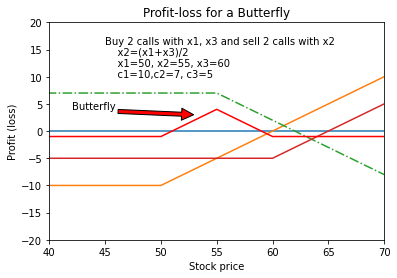

In [28]:
import matplotlib.pyplot as plt 
import numpy as np 
sT = np.arange(30,80,5) 
x1=50;    c1=10 
x2=55;    c2=7
x3=60;    c3=5 
y1=(abs(sT-x1)+sT-x1)/2-c1 
y2=(abs(sT-x2)+sT-x2)/2-c2 
y3=(abs(sT-x3)+sT-x3)/2-c3 
butter_fly=y1+y3-2*y2 
y0=np.zeros(len(sT)) 
plt.ylim(-20,20) 
plt.xlim(40,70) 
plt.plot(sT,y0) 
plt.plot(sT,y1) 
plt.plot(sT,-y2,'-.') 
plt.plot(sT,y3) 
plt.plot(sT,butter_fly,'r') 
plt.title("Profit-loss for a Butterfly") 
plt.xlabel('Stock price') 
plt.ylabel('Profit (loss)') 
plt.annotate('Butterfly', xy=(53,3), xytext=(42,4), arrowprops=dict(facecolor='red',shrink=0.01),) 
plt.annotate('Buy 2 calls with x1, x3 and sell 2 calls with x2', xy=(45,16)) 
plt.annotate('    x2=(x1+x3)/2', xy=(45,14)) 
plt.annotate('    x1=50, x2=55, x3=60',xy=(45,12)) 
plt.annotate('    c1=10,c2=7, c3=5', xy=(45,10)) 
plt.show()

<ipython-input-25-388961d668e4>:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1=(log(S/X)+(rf+sigma*sigma/2.)*T)/(sigma*sqrt(T))
<ipython-input-25-388961d668e4>:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1=(log(S/X)+(rf+sigma*sigma/2.)*T)/(sigma*sqrt(T))
<ipython-input-25-388961d668e4>:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2 = d1-sigma*sqrt(T)
<ipython-input-25-388961d668e4>:5: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return S*stats.norm.cdf(d1)-X*exp(-rf*T)*stats.norm.cdf(d2)


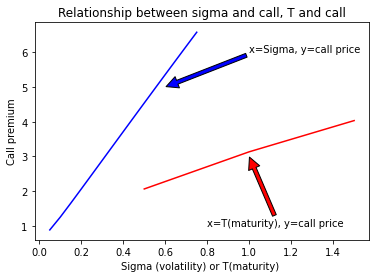

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
s0=30 
T0=0.5 
sigma0=0.2 
r0=0.05 
x0=30 
sigma=np.arange(0.05,0.8,0.05) 
T=np.arange(0.5,2.0,0.5) 
call_0=bs_call(s0,x0,T0,r0,sigma0) 
call_sigma=bs_call(s0,x0,T0,r0,sigma) 
call_T=bs_call(s0,x0,T,r0,sigma0) 
plt.title("Relationship between sigma and call, T and call") 
plt.plot(sigma,call_sigma,'b') 
plt.plot(T,call_T,'r') 
plt.annotate('x=Sigma, y=call price', xy=(0.6,5), xytext=(1,6), arrowprops=dict(facecolor='blue',shrink=0.01),) 
plt.annotate('x=T(maturity), y=call price', xy=(1,3), xytext=(0.8,1), arrowprops=dict(facecolor='red',shrink=0.01),) 
plt.ylabel("Call premium") 
plt.xlabel("Sigma (volatility) or T(maturity) ") 
plt.show()

In [30]:
from scipy import log,exp,sqrt,stats 
tiny=1e-9 
S=40 
X=40 
T=0.5 
r=0.01 
sigma=0.2
def bsCall(S,X,T,r,sigma):
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))    
    d2 = d1-sigma*sqrt(T)    
    return S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2)
def delta1(S,X,T,r,sigma):    
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))    
    return stats.norm.cdf(d1)
def delta2(S,X,T,r,sigma):    
    s1=S    
    s2=S+tiny   
    c1=bsCall(s1,X,T,r,sigma)    
    c2=bsCall(s2,X,T,r,sigma)    
    delta=(c2-c1)/(s2-s1)    
    return delta
print("delta (close form)=", delta1(S,X,T,r,sigma)) 
print("delta (tiny number)=", delta2(S,X,T,r,sigma)) 

delta (close form)= 0.5422350133116141
delta (tiny number)= 0.5422383594932392


<ipython-input-30-f27858a65322>:13: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
<ipython-input-30-f27858a65322>:13: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
<ipython-input-30-f27858a65322>:9: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
<ipython-input-30-f27858a65322>:9: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
<ipython-input-30-f27858a65322>:10: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2 = d1-sigma*sqrt(T)
<ipython-i

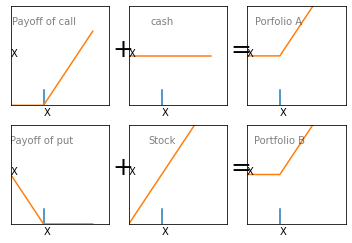

In [31]:
import pylab as pl 
import numpy as np
x=10 
sT=np.arange(0,30,5) 
payoff_call=(abs(sT-x)+sT-x)/2 
payoff_put=(abs(x-sT)+x-sT)/2 
cash=np.zeros(len(sT))+x
def graph(text,text2=''):     
    pl.xticks(())    
    pl.yticks(())    
    pl.xlim(0,30)    
    pl.ylim(0,20)     
    pl.plot([x,x],[0,3])    
    pl.text(x,-2,"X");    
    pl.text(0,x,"X")    
    pl.text(x,x*1.7, text, ha='center', va='center',size=10, alpha=.5)     
    pl.text(-5,10,text2,size=25)    
pl.figure(figsize=(6, 4)) 
pl.subplot(2, 3, 1); 
graph('Payoff of call');       
pl.plot(sT,payoff_call) 
pl.subplot(2, 3, 2); 
graph('cash','+');             
pl.plot(sT,cash) 
pl.subplot(2, 3, 3); 
graph('Porfolio A ','=');   
pl.plot(sT,cash+payoff_call) 
pl.subplot(2, 3, 4); 
graph('Payoff of put ');       
pl.plot(sT,payoff_put) 
pl.subplot(2, 3, 5); 
graph('Stock','+');       
pl.plot(sT,sT) 
pl.subplot(2, 3, 6);
graph('Portfolio B','=');   
pl.plot(sT,sT+payoff_put) 
pl.show()

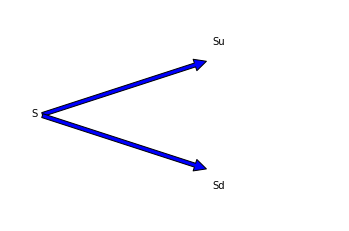

In [32]:
import matplotlib.pyplot as plt 
plt.xlim(0,1) 
plt.figtext(0.18,0.5,'S') 
plt.figtext(0.6,0.5+0.25,'Su') 
plt.figtext(0.6,0.5-0.25,'Sd')
plt.annotate('',xy=(0.6,0.5+0.25), xytext=(0.1,0.5), arrowprops=dict(facecolor='b',shrink=0.01)) 
plt.annotate('',xy=(0.6,0.5-0.25), xytext=(0.1,0.5), arrowprops=dict(facecolor='b',shrink=0.01)) 
plt.axis('off') 
plt.show()

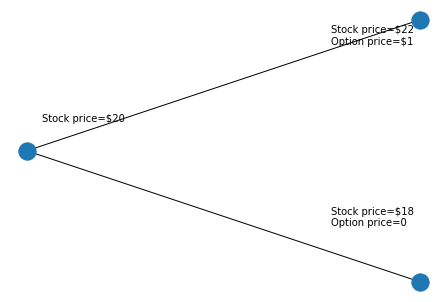

In [33]:
import networkx as nx 
import matplotlib.pyplot as plt 
plt.figtext(0.08,0.6,"Stock price=$20") 
plt.figtext(0.75,0.91,"Stock price=$22")
plt.figtext(0.75,0.87,"Option price=$1") 
plt.figtext(0.75,0.28,"Stock price=$18") 
plt.figtext(0.75,0.24,"Option price=0") 
n=1 
def binomial_grid(n):     
    G=nx.Graph()    
    for i in range(0,n+1):        
        for j in range(1,i+2):             
            if i<n:                
                G.add_edge((i,j),(i+1,j))                
                G.add_edge((i,j),(i+1,j+1))    
    posG={}    
    for node in G.nodes():         
        posG[node]=(node[0],n+2+node[0]-2*node[1])    
    nx.draw(G,pos=posG) 
binomial_grid(n) 
plt.show() 

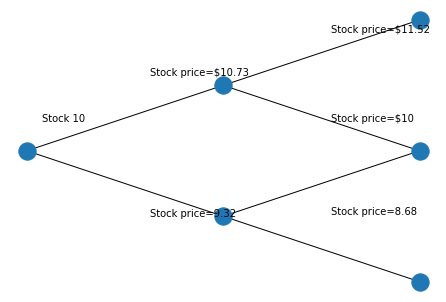

In [34]:
from math import sqrt,exp 
import matplotlib.pyplot as plt 
s=10 
r=0.02 
sigma=0.2 
T=3./12 
x=10 
n=2 
deltaT=T/n 
q=0 
u=exp(sigma*sqrt(deltaT)) 
d=1/u 
a=exp((r-q)*deltaT) 
p=(a-d)/(u-d) 
su=round(s*u,2); 
suu=round(s*u*u,2) 
sd=round(s*d,2) 
sdd=round(s*d*d,2) 
sud=s
plt.figtext(0.08,0.6,'Stock '+str(s)) 
plt.figtext(0.33,0.76,"Stock price=$"+str(su)) 
plt.figtext(0.33,0.27,'Stock price='+str(sd)) 
plt.figtext(0.75,0.91,'Stock price=$'+str(suu)) 
plt.figtext(0.75,0.6,'Stock price=$'+str(sud)) 
plt.figtext(0.75,0.28,"Stock price="+str(sdd)) 
binomial_grid(n) 
plt.show()

<ipython-input-35-e26d0586220b>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  u=sp.exp(sigma*sp.sqrt(deltaT))
<ipython-input-35-e26d0586220b>:5: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  u=sp.exp(sigma*sp.sqrt(deltaT))
<ipython-input-35-e26d0586220b>:7: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  a=sp.exp((r-q)*deltaT)
<ipython-input-35-e26d0586220b>:36: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  c_01=round((p*c_suu+(1-p)*c_s)*sp.exp(-r*deltaT),2)
<ipython-input-35-e26d0586220b>:37: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  c_02=round((p*c_s+(1-p)*c_sdd)*sp.exp(-r*deltaT),2)
<ipython-input-35-e26d0586220b>:44: DeprecationWarning: scipy.exp is deprecated and will be remove

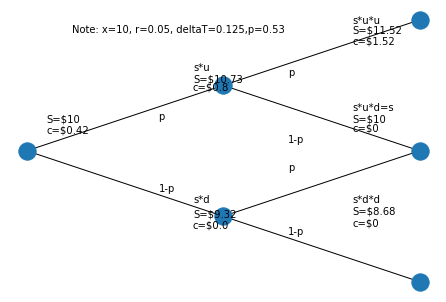

In [35]:
import scipy as sp 
import matplotlib.pyplot as plt 
s=10;x=10;r=0.05;sigma=0.2;T=3./12.;n=2;q=0    # q is dividend yield 
deltaT=T/n    # step 
u=sp.exp(sigma*sp.sqrt(deltaT)) 
d=1/u 
a=sp.exp((r-q)*deltaT) 
p=(a-d)/(u-d) 
s_dollar='S=$' 
c_dollar='c=$'
p2=round(p,2) 
plt.figtext(0.15,0.91,'Note: x='+str(x)+', r='+str(r)+', deltaT='+str( deltaT)+',p='+str(p2)) 
plt.figtext(0.35,0.61,'p') 
plt.figtext(0.65,0.76,'p') 
plt.figtext(0.65,0.43,'p') 
plt.figtext(0.35,0.36,'1-p') 
plt.figtext(0.65,0.53,'1-p') 
plt.figtext(0.65,0.21,'1-p')
# at level 2 
su=round(s*u,2); suu=round(s*u*u,2) 
sd=round(s*d,2); sdd=round(s*d*d,2) 
sud=s 
c_suu=round(max(suu-x,0),2) 
c_s=round(max(s-x,0),2) 
c_sdd=round(max(sdd-x,0),2) 
plt.figtext(0.8,0.94,'s*u*u') 
plt.figtext(0.8,0.91,s_dollar+str(suu)) 
plt.figtext(0.8,0.87,c_dollar+str(c_suu)) 
plt.figtext(0.8,0.6,s_dollar+str(sud)) 
plt.figtext(0.8,0.64,'s*u*d=s') 
plt.figtext(0.8,0.57,c_dollar+str(c_s)) 
plt.figtext(0.8,0.32,'s*d*d') 
plt.figtext(0.8,0.28,s_dollar+str(sdd)) 
plt.figtext(0.8,0.24,c_dollar+str(c_sdd))
# at level 1 
c_01=round((p*c_suu+(1-p)*c_s)*sp.exp(-r*deltaT),2) 
c_02=round((p*c_s+(1-p)*c_sdd)*sp.exp(-r*deltaT),2)
plt.figtext(0.43,0.78,'s*u') 
plt.figtext(0.43,0.74,s_dollar+str(su)) 
plt.figtext(0.43,0.71,c_dollar+str(c_01)) 
plt.figtext(0.43,0.32,'s*d') 
plt.figtext(0.43,0.27,s_dollar+str(sd)) 
plt.figtext(0.43,0.23,c_dollar+str(c_02)) # at level 0 (today)
c_00=round(p*sp.exp(-r*deltaT)*c_01+(1-p)*sp.exp(-r*deltaT)*c_02,2) 
plt.figtext(0.09,0.6,s_dollar+str(s)) 
plt.figtext(0.09,0.56,c_dollar+str(c_00)) 
binomial_grid(n)

In [36]:
    def binomialCallEuropean(s,x,T,r,sigma,n=100):    
        from math import exp,sqrt     
        deltaT = T / n   
        u = exp(sigma * sqrt(deltaT))
        d = 1.0 / u    
        a = exp(r * deltaT)    
        p = (a - d) / (u - d)   
        v = [[0.0 for j in xrange(i + 1)]  for i in xrange(n + 1)]     
        for j in xrange(i+1):        
             v[n][j] = max(s * u**j * d**(n - j) - x, 0.0)  
        for i in xrange(n-1, -1, -1):        
            for j in xrange(i + 1):            
                v[i][j]=exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])     
        return v[0][0]

In [37]:
def binomialCallAmerican(s,x,T,r,sigma,n=100):    
    from math import exp,sqrt    
    import numpy as np    
    deltaT = T /n   
    u = exp(sigma * sqrt(deltaT))     
    d = 1.0 / u    
    a = exp(r * deltaT)    
    p = (a - d) / (u - d)    
    v = [[0.0 for j in np.arange(i + 1)] for i in np.arange(n + 1)]     
    for j in np.arange(n+1):       
        v[n][j] = max(s * u**j * d**(n - j) - x, 0.0)     
    for i in np.arange(n-1, -1, -1):        
        for j in np.arange(i + 1):            
            v1=exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])             
            v2=max(v[i][j]-x,0)           # early exercise            
            v[i][j]=max(v1,v2)    
    return v[0][0]

In [38]:
def bs_call(S,X,T,r,sigma):    
    from scipy import log,exp,sqrt,stats 
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T)) 
    d2 = d1-sigma*sqrt(T) 
    return S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2)

In [39]:
def implied_vol_call(S,X,T,r,c):   
    from scipy import log,exp,sqrt,stats    
    for i in range(200):       
        sigma=0.005*(i+1)       
        d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))        
        d2 = d1-sigma*sqrt(T)        
        diff=c-(S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2))        
        if abs(diff)<=0.01:           
            return i,sigma, diff 

In [40]:
def implied_vol_put_min(S,X,T,r,p):    
    from scipy import log,exp,sqrt,stats     
    implied_vol=1.0    
    min_value=100.0    
    for i in xrange(1,10000):         
        sigma=0.0001*(i+1)        
        d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))         
        d2 = d1-sigma*sqrt(T)        
        put=X*exp(-r*T)*stats.norm.cdf(-d2)-S*stats.norm.cdf(-d1)         
        abs_diff=abs(put-p)       
        if abs_diff<min_value:             
            min_value=abs_diff             
            implied_vol=sigma             
            k=i        
            put_out=put    
        print ('k, implied_vol, put, abs_diff')     
        return k,implied_vol, put_out,min_value

In [41]:
def binary_search(x, target, my_min=1, my_max=None):    
    if my_max is None:       
        my_max = len(x) - 1    
        while my_min <= my_max:      
            mid = (my_min + my_max)//2     
            midval = x[mid]      
            if midval < target:          
                my_min = my_mid + 1      
            elif midval > target:          
                my_max = mid - 1      
            else:          
                return mid    
        raise ValueError

In [42]:
from scipy import log,exp,sqrt,stats 
S=42;X=40;T=0.5;r=0.01;c=3.0 
def bsCall(S,X,T,r,sigma):    
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))     
    d2 = d1-sigma*sqrt(T)    
    return S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2) # 
def impliedVolBinary(S,X,T,r,c):   
    k=1    
    volLow=0.001  
    volHigh=1.0    
    cLow=bsCall(S,X,T,r,volLow)    
    cHigh=bsCall(S,X,T,r,volHigh)    
    if cLow>c or cHigh<c:        
        raise ValueError   
        while k ==1:        
            cLow=bsCall(S,X,T,r,volLow)        
            cHigh=bsCall(S,X,T,r,volHigh)        
            volMid=(volLow+volHigh)/2.0        
            cMid=bsCall(S,X,T,r,volMid)        
            if abs(cHigh-cLow)<0.01:           
                k=2       
            elif cMid>c:            
                    volHigh=volMid        
            else:            
                volLow=volMid    
        return volMid, cLow, cHig

<ipython-input-43-0f46eadcf4b6>:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x = sp.arange(-3,3,0.1)


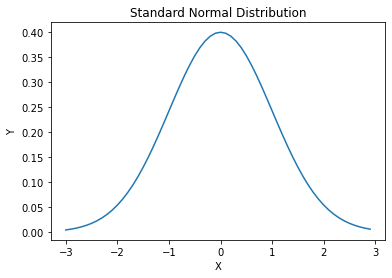

In [43]:
import scipy as sp 
import matplotlib.pyplot as plt 
x = sp.arange(-3,3,0.1) 
y=sp.stats.norm.pdf(x) 
plt.title("Standard Normal Distribution") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.plot(x,y) 
plt.show()

<ipython-input-44-ddbe2242ea8a>:11: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x = sp.arange(-3,3,0.1)
<ipython-input-44-ddbe2242ea8a>:14: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x2= sp.arange(-4,z,1/40.)
<ipython-input-44-ddbe2242ea8a>:17: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  s=sp.arange(-10,z,delta)


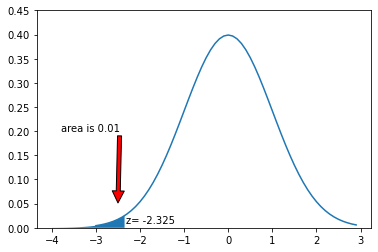

In [44]:
import scipy as sp 
from matplotlib import pyplot as plt 
z=-2.325       # user can change this number 
xStart=-3.8    # arrow line start x 
yStart=0.2     # arrow line start x 
xEnd=-2.5      # arrow line start x 
yEnd=0.05      # arrow line start x 
def f(t):    
    return sp.stats.norm.pdf(t) 
plt.ylim(0,0.45) 
x = sp.arange(-3,3,0.1) 
y1=f(x) 
plt.plot(x,y1) 
x2= sp.arange(-4,z,1/40.) 
sum=0 
delta=0.05
s=sp.arange(-10,z,delta) 
for i in s:    
    sum+=f(i)*delta
plt.annotate('area is '+str(round(sum,4)),xy=(xEnd,yEnd),xytext=(xStart,yStart), arrowprops=dict(facecolor='red',shrink=0.01)) 
plt.annotate('z= '+str(z),xy=(z,0.01)) 
plt.fill_between(x2,f(x2)) 
plt.show()

<ipython-input-45-122d8318c51d>:10: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x = sp.arange(-7,7,0.1)
<ipython-input-45-122d8318c51d>:13: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x2= sp.arange(-4,z,1/40.)
<ipython-input-45-122d8318c51d>:14: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x3=sp.arange(z,4,1/40.)
<ipython-input-45-122d8318c51d>:17: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  s=sp.arange(-3,z,delta)


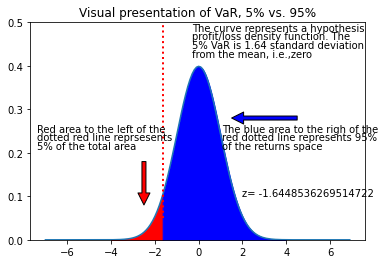

In [45]:
import scipy as sp 
import scipy as sp 
from scipy.stats import norm 
from matplotlib import pyplot as plt
confidence_level=0.95   # input 
z=norm.ppf(1-confidence_level) 
def f(t):    
    return sp.stats.norm.pdf(t) # 
plt.ylim(0,0.5) 
x = sp.arange(-7,7,0.1)
ret=f(x) 
plt.plot(x,ret) 
x2= sp.arange(-4,z,1/40.) 
x3=sp.arange(z,4,1/40.) 
sum=0 
delta=0.05 
s=sp.arange(-3,z,delta) 
for i in s:    
    sum+=f(i)*delta 
note1='Red area to the left of the' 
note2='dotted red line reprsesents' 
note3='5% of the total area' # 
note4='The curve represents a hypothesis' 
note5='profit/loss density function. The' 
note6='5% VaR is 1.64 standard deviation' 
note7='from the mean, i.e.,zero' #
note8='The blue area to the righ of the' 
note9='red dotted line represents 95%' 
note10='of the returns space' # this is for the vertical line 
plt.axvline(x=z, ymin=0.1, ymax = 1, linewidth=2,ls='dotted', color='r') 
plt.figtext(0.14,0.5,note1) 
plt.figtext(0.14,0.47,note2) 
plt.figtext(0.14,0.44,note3) # 
plt.figtext(0.5,0.85,note4) 
plt.figtext(0.5,0.82,note5) 
plt.figtext(0.5,0.79,note6) 
plt.figtext(0.5,0.76,note7) 
plt.annotate("",xy=(-2.5,0.08),xytext=(-2.5,0.18), arrowprops=dict(facecolor='red',shrink=0.001)) # 
plt.figtext(0.57,0.5,note8) 
plt.figtext(0.57,0.47,note9) 
plt.figtext(0.57,0.44,note10) 
plt.annotate("",xy=(1.5,0.28),xytext=(4.5,0.28), arrowprops=dict(facecolor='blue',shrink=0.001)) # 
plt.annotate('z= '+str(z),xy=(2.,0.1)) 
plt.fill_between(x2,f(x2), color='red') 
plt.fill_between(x3,f(x3), color='blue') 
plt.title("Visual presentation of VaR, 5% vs. 95%") 
plt.show()


In [70]:
import numpy as np
import pandas as pd
from scipy.stats import norm
# from matplotlib.finance import quotes_historical_yahoo_ochl as getData
import yfinance as yf
#
# input area
ticker='IBM'              # input 1
n_shares=1000             # input 2
confidence_level=0.99     # input 3
# begdate=(2012,2,7)        # input 4
# enddate=(2017,2,7)        # input 5
begdate=datetime.datetime(2012,2,7)        # input 4
enddate=datetime.datetime(2017,2,7)        # input 5
z=norm.ppf(1-confidence_level) 
# x=yf(ticker,begdate,enddate,asobject=True,adjusted=True)
x = yf.Ticker('IBM')
x = x.history(start=begdate, end=enddate)
# print(x[0])
ret = x.aclose[1:]/x.aclose[:-1]-1
#
position=n_shares*x.close[0] 
std=np.std(ret)
#
VaR=position*z*std
print("Holding=",position, "VaR=", round(VaR,4), "tomorrow")
(datetime.date(2012, 2, 7), 2012, 2, 7, 734540.0, 167.75861437920275, 
168.543152, 169.23178870104016, 167.34020198573538, 3433000.0, 
168.543152)
('Holding=', 168543.152, 'VaR=', -4603.5087, 'tomorrow')

AttributeError: 'DataFrame' object has no attribute 'aclose'

In [61]:
import yfinance as yf
import datetime
x = yf.Ticker('IBM')

In [64]:
begdate=datetime.datetime(2012,2,7)        # input 4
enddate=datetime.datetime(2017,2,7)        # input 5
x = x.history(start=begdate, end=enddate)

In [71]:
x

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-02-06,137.815679,138.732159,137.472003,138.059128,3639800,0.00,0
2012-02-07,137.794238,139.004280,137.450561,138.438644,3433000,0.00,0
2012-02-08,138.567993,139.143026,137.813263,138.690186,3803800,0.75,0
2012-02-09,138.747666,139.775539,138.402651,138.819550,3876400,0.00,0
2012-02-10,137.834847,138.316434,137.489832,138.309250,3391100,0.00,0
...,...,...,...,...,...,...,...
2017-01-31,142.655260,143.087177,141.481744,142.223343,4139000,0.00,0
2017-02-01,142.614517,143.184972,140.894993,142.035904,2795700,0.00,0
2017-02-02,141.986998,142.590058,141.432845,142.272232,2620500,0.00,0
